# Beam bending Solver - Utkarsh Gaikwad

# Bending Moment and Shear Force Diagram of Beam

In [1]:
import math 
import numpy as np

In [2]:
pointLoads = np.array([[]])
pointMoments = np.array([[]])
distributedLoads = np.array([[]])
linearLoads = np.array([[]])

# Beam Problem to solve below

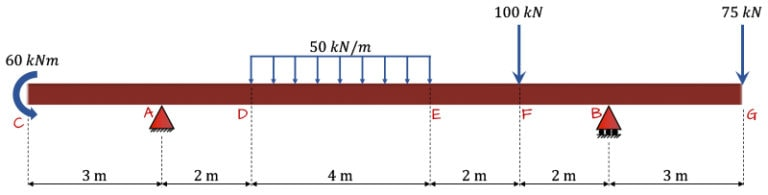

In [3]:
#Input span and force data below
span = 16
A = 3
B = 13

#Force Data
pointLoads = np.array([[11,0,-100],
                       [16,0,-75]])
pointMoments = np.array([[0,-60]])
distributedLoads = np.array([[5,9,-50]])
#linearLoads = np.array([[8,17,-10,0]])

deltaRot = 0.000005
initRot = -0.0021
E = 12*(10**9)
I = (0.04*(0.08**3))/12

In [4]:
#Default Initialisations
#divs = 10000 
#delta = span/divs
delta = 0.005
X = np.arange(0,span+delta,delta)
nPL = len(pointLoads[0])
nPM = len(pointMoments[0])
nUDL = len(distributedLoads[0])
nLDL = len(linearLoads[0])

reactions = np.array([0.0,0.0,0.0])
shearForce = np.empty([0,len(X)])
bendingMoment = np.empty([0,len(X)])

# Reaction Calculation 

Cycle through all loads and calculate reactions due to point Load

In [5]:
def reactions_PL(n):
    xp = pointLoads[n,0]
    fx = pointLoads[n,1]
    fy = pointLoads[n,2]
    
    la_p = A - xp
    mp = fy*la_p
    la_vb = B-A
    
    Vb = mp/la_vb
    Va = -fy - Vb
    Ha = -fx
    
    return Va, Vb, Ha    

In [6]:
PL_record = np.empty([0,3])

if (nPL>0):
    for n,p in enumerate(pointLoads):
        va, vb, ha = reactions_PL(n)  
        PL_record = np.append(PL_record,[np.array([va,ha,vb])],axis = 0)
        
        reactions[0] = reactions[0] + va
        reactions[1] = reactions[1] + ha
        reactions[2] = reactions[2] + vb

Calculate reaction due to Moments

In [7]:
def reactions_PM(n):
    xm = pointMoments[n,0]
    m = pointMoments[n,1]
    la_vb = B-A
    
    Vb = m/la_vb
    Va = -Vb
    
    return Va, Vb

In [8]:
PM_record = np.empty([0,2])
if (nPM>0):
    for n, p in enumerate(pointMoments):
        va, vb = reactions_PM(n)
        PM_record = np.append(PM_record,[np.array([va,vb])],axis=0)
        
        reactions[0] = reactions[0] + va
        reactions[2] = reactions[2] + vb

Calculate Reactions due to UDL

In [9]:
def reactions_UDL(n):
    xStart = distributedLoads[n,0]
    xEnd = distributedLoads[n,1]
    fy = distributedLoads[n,2]
    
    fy_Res = fy*(xEnd-xStart)
    x_Res = xStart + 0.5*(xEnd-xStart)
    
    la_p = A - x_Res
    mp = fy_Res*la_p
    la_vb = B-A
    
    Vb = mp/la_vb
    Va = -fy_Res - Vb
    
    return Va, Vb

In [10]:
UDL_record = np.empty([0,2])
if (nUDL>0):
    for n, p in enumerate(distributedLoads):
        va,vb = reactions_UDL(n)
        UDL_record = np.append(UDL_record,[np.array([va,vb])],axis=0)
        
        reactions[0] = reactions[0] + va
        reactions[2] = reactions[2] + vb    

Calculate Reactions due to LDL

In [11]:
def reactions_LDL(n):
    xStart = linearLoads[n,0]
    xEnd = linearLoads[n,1]
    fy_start = linearLoads[n,2]
    fy_end = linearLoads[n,3]
    
    if abs(fy_start)>0:
        fy_Res = 0.5*fy_start*(xEnd-xStart)
        x_Res = xStart + (1/3)*(xEnd-xStart)
    else:
        fy_res = 0.5*fy_end*(xEnd-xStart)
        xRes = xStart + (2/3)*(xEnd-xStart)
        
    la_p = A - x_Res
    mp = fy_Res*la_p
    la_vb = B-A
    
    Vb = mp/la_vb
    Va = -fy_Res-Vb
    
    return Va, Vb   

In [12]:
LDL_record = np.empty([0,2])
if(nLDL>0):
    for n, p in enumerate(linearLoads):
        va,vb = reactions_LDL(n)
        LDL_record = np.append(LDL_record,[np.array([va,vb])],axis=0)
        
        reactions[0] = reactions[0] + va
        reactions[2] = reactions[2] + vb    

# Shear and Moment calculation 

Calculate Shear and Moment due to Point Load

In [13]:
def shear_moment_PL(n):
    xp = pointLoads[n,0]
    fy = pointLoads[n,2]
    Va = PL_record[n,0]
    Vb = PL_record[n,2]
    
    Shear = np.zeros(len(X))
    Moment = np.zeros(len(X))
    
    for i,x in enumerate(X):
        shear = 0
        moment = 0
        
        if x>A:
            shear = shear + Va
            moment  = moment -Va*(x-A)
            
        if x>B:
            shear = shear + Vb
            moment = moment - Vb*(x-B)
            
        if x>xp:
            shear = shear + fy
            moment = moment - fy*(x-xp)
            
        Shear[i] = shear
        Moment[i] = moment
    
    return Shear, Moment

In [14]:
if (nPL>0):
    for n, p in enumerate(pointLoads):
        Shear, Moment = shear_moment_PL(n)
        shearForce = np.append(shearForce, [Shear], axis = 0)
        bendingMoment = np.append(bendingMoment, [Moment], axis = 0)

Calculate Shear and Force due to Point Moments

In [15]:
def shear_moment_PM(n):
    xm = pointMoments[n,0]
    m = pointMoments[n,1]
    Va = PM_record[n,0]
    Vb = PM_record[n,1]
    
    Shear = np.zeros(len(X))
    Moment = np.zeros(len(X))
    
    for i, x in enumerate(X):
        shear = 0 
        moment = 0
        
        if x>A:
            shear = shear + Va
            moment = moment - Va*(x-A)
        
        if x>B:
            shear = shear + Vb
            moment = moment - Vb*(x-B)
            
        if x>xm:
            moment = moment - m
            
        Shear[i]= shear
        Moment[i]= moment
    
    return Shear, Moment

In [16]:
if(nPM>0):
    for n, p in enumerate(pointMoments):
        Shear, Moment = shear_moment_PM(n)
        shearForce = np.append(shearForce, [Shear], axis = 0)
        bendingMoment = np.append(bendingMoment, [Moment], axis = 0)        

Calculate Shear and Moment due to UDL

In [17]:
def shear_moment_UDL(n):
    xStart = distributedLoads[n,0]
    xEnd = distributedLoads[n,1]
    fy = distributedLoads[n,2]
    
    fy_Res = fy*(xEnd-xStart)
    x_Res = xStart + 0.5*(xEnd-xStart)
    Va = UDL_record[n,0]
    Vb = UDL_record[n,1]
    
    Shear = np.zeros(len(X))
    Moment = np.zeros(len(X))
    
    for i, x in enumerate(X):
        shear = 0 
        moment = 0
        
        if x>A:
            shear = shear + Va
            moment = moment - Va*(x-A)
        
        if x>B:
            shear = shear + Vb
            moment = moment - Vb*(x-B)
            
        if x>xStart and x<=xEnd:
            shear = shear + fy*(x-xStart)
            moment = moment -fy*(x-xStart)*0.5*(x-xStart)
        elif(x>xEnd):
            shear = shear + fy*(xEnd-xStart)
            moment = moment - fy*(xEnd-xStart)*(x - xStart-0.5*(xEnd-xStart))
            
        Shear[i]= shear
        Moment[i]= moment
        
    return Shear, Moment

In [18]:
if (nUDL>0):
    for n, p in enumerate(distributedLoads):
        Shear, Moment = shear_moment_UDL(n)
        shearForce = np.append(shearForce, [Shear], axis = 0)
        bendingMoment = np.append(bendingMoment, [Moment], axis = 0)    

Shear Force and Bending Moment due to LDL

In [19]:
def shear_moment_LDL(n):
    xStart = linearLoads[n,0]
    xEnd = linearLoads[n,1]
    fy_start = linearLoads[n,2]
    fy_end = linearLoads[n,3]
    Va = LDL_record[n,0]
    Vb = LDL_record[n,1]
    
    Shear = np.zeros(len(X))
    Moment = np.zeros(len(X))
    
    for i, x in enumerate(X):
        shear = 0 
        moment = 0
        
        if x>A:
            shear = shear + Va
            moment = moment - Va*(x-A)
        
        if x>B:
            shear = shear + Vb
            moment = moment - Vb*(x-B)
            
        if x>xStart and x<=xEnd:
            if abs(fy_start)>0:
                x_base = x-xStart
                f_cut = fy_start - x_base*(fy_start/(xEnd-xStart))
                R1 = 0.5*x_base*(fy_start-f_cut)
                R2 = x_base*f_cut
                shear = shear + R1 + R2
                moment = moment - R1*(2/3)*x_base -R2*(x_base/2)                
            else:
                x_base = x-xStart
                f_cut = fy_end*x_base/(xEnd-xStart)
                R = 0.5*x_base*f_cut
                shear = shear + R
                moment = moment - R*(x_base/3)
            
        elif(x>xEnd):
            if abs(fy_start)>0:
                R = 0.5*fy_start*(xEnd-xStart)
                xr = xStart + (1/3)*(xEnd-xStart)
                shear = shear + R
                moment = moment- R*(x-xr)            
            else:
                R = 0.5*fy_end*(xEnd-xStart)
                xr = xStart + (2/3)*(xEnd-xStart)
                shear = shear + R
                moment = moment-R*(x-xr)            
            
        Shear[i]= shear
        Moment[i]= moment
        
    return Shear, Moment  

In [20]:
if (nLDL>0):
    for n, p in enumerate(linearLoads):
        Shear, Moment = shear_moment_LDL(n)
        shearForce = np.append(shearForce, [Shear], axis = 0)
        bendingMoment = np.append(bendingMoment, [Moment], axis = 0)    

# Plotting and Printing 

In [21]:
print('The vertical reaction at A is {one} kN'.format(one = round(reactions[0],4)))
print('The vertical reaction at B is {one} kN'.format(one = round(reactions[2],4)))
print('The horizontal reaction at A is {one} kN'.format(one = round(reactions[1],4)))

The vertical reaction at A is 123.5 kN
The vertical reaction at B is 251.5 kN
The horizontal reaction at A is 0.0 kN


# Plotly

In [22]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

In [23]:
#Define Layout
layout = go.Layout(
    title = {'text':'Shear Force Diagram', 'y':0.85,'x':0.5,'xanchor':'center','yanchor':'top'},
    yaxis = dict(title="Shear Force (kN)"),
    xaxis = dict(title="Distance(m)",range = [-1,span+1] ),
    showlegend = False,
)

line = go.Scatter(
    x = X,
    y = sum(shearForce),
    mode = 'lines',
    name = 'Shear Force',
    fill = 'tonexty',
    line_color = 'green',
    fillcolor = 'rgba(0,255,0,0.1)'
)

axis = go.Scatter(
    x = [0,span],
    y = [0,0],
    mode = 'lines',
    line_color = 'black'

)

#Generate and view figure
fig = go.Figure(data=[line,axis],layout=layout)
py.offline.iplot(fig)

In [24]:
#Define Layout
layout = go.Layout(
    title = {'text':'Bending Moment Diagram', 'y':0.85,'x':0.5,'xanchor':'center','yanchor':'top'},
    yaxis = dict(title="Bending Moment (kN-m)",autorange='reversed'),
    xaxis = dict(title="Distance(m)",range = [-1,span+1] ),
    showlegend = False,
)

line = go.Scatter(
    x = X,
    y = -sum(bendingMoment),
    mode = 'lines',
    name = 'Bending Moment',
    fill = 'tonexty',
    line_color = 'red',
    fillcolor = 'rgba(255,0,0,0.1)'
)

axis = go.Scatter(
    x = [0,span],
    y = [0,0],
    mode = 'lines',
    line_color = 'black'

)

#Generate and view figure
fig = go.Figure(data=[line,axis],layout=layout)
py.offline.iplot(fig)

<Hr>

# Beam Deflection

Constants and Initialisations

In [25]:
M = -sum(bendingMoment)
delX = X[1]-X[0]
EI = E*I
initDef = 0
supportIndexA = np.where(X==A)[0].item()
supportIndexB = np.where(X==B)[0].item()

Define a function to calculate integral using Trapezoidal Rule

In [26]:
def calcDeflection(M,EI,delX,theta_0,v_0):
    theta_im1 = theta_0
    v_im1 = v_0
    
    Rotation = np.zeros(len(X))
    Rotation[supportIndexA] = theta_im1
    Deflection = np.zeros(len(X))
    Deflection[supportIndexA] = v_im1
    
    for i,m in enumerate(M[supportIndexA::]):
        ind = i + supportIndexA
        if i>0:
            M_im1 = M[ind-1]
            M_i = M[ind]
            M_avg = 0.5*(M_i+M_im1)
            
            theta_i = theta_im1 + (M_avg/EI)*delX
            v_i = v_im1 + 0.5*(theta_i+theta_im1)*delX
            
            Rotation[ind]=theta_i
            Deflection[ind]=v_i
            
            theta_im1 = theta_i
            v_im1 = v_i
            
    return Rotation, Deflection

Define a function to sweep range of initial rotation values and identify the one that minimised deflection at right support

In [27]:
def zeroCrossing(Deflection,guessStep,initRot,initDef):
    
    if (Deflection[supportIndexB]>0):
        errorIsPositive = True
        
        while errorIsPositive:
            initRot = initRot + guessStep
            Rotation, Deflection = calcDeflection(M,EI,delX,initRot,initDef)
            
            if Deflection[supportIndexB]<0:
                errorIsPositive = False
                solvedInitRotation = initRot
    
    elif (Deflection[supportIndexB]<0):
        errorIsPositive = False
        
        while not errorIsPositive:
            initRot = initRot + guessStep
            Rotation, Deflection = calcDeflection(M,EI,delX,initRot,initDef)
            
            if Deflection[supportIndexB]>0:
                errorIsPositive = True
                solvedInitRotation = initRot
                
    return solvedInitRotation

Test wether we need to sweep for initial rotation in positive or negative and call sweeper function from above

In [28]:
testDef = np.zeros(3)
for i, r in enumerate([initRot-deltaRot,initRot,initRot+deltaRot]):
    Rotation,Deflection = calcDeflection(M,EI,delX,r,initDef)
    testDef[i]=Deflection[supportIndexB]
    
if (abs(testDef[0])<abs(testDef[1])):
    print('Need to test in negative direction')
    solvedInitRotation = zeroCrossing(Deflection, -deltaRot, initRot, initDef)
elif(abs(testDef[2])<abs(testDef[1])):
    print('Need to test in positive direction')
    solvedInitRotation = zeroCrossing(Deflection, deltaRot, initRot, initDef)
    
Rotation, Deflection = calcDeflection(M,EI,delX,solvedInitRotation,initDef)
print('Solved initial rotation is {one}'.format(one=solvedInitRotation))
print('The error in displacement at support is {one}'.format(one = Deflection[supportIndexB]))

Need to test in negative direction
Solved initial rotation is -0.04614499999999846
The error in displacement at support is -2.4357604965649757e-05


<Hr>
Solve Deflection to left of support A (if required)

In [29]:
if A!=0:
    print('There is an overhang on left side - solve for deflection by integrating in reverse direction.')
    
    theta_im1 = -solvedInitRotation
    v_im1 = 0
    
    reverseRange = np.arange(supportIndexA-1,-1,-1)
    
    for i in reverseRange:
        M_im1 = M[i+1]
        M_i= M[i]
        M_avg = 0.5*(M_i+M_im1)
        
        theta_i = theta_im1 + (M_avg/EI)*delX
        v_i = v_im1 + 0.5*(theta_i+theta_im1)*delX
            
        Rotation[i]=theta_i
        Deflection[i]=v_i
            
        theta_im1 = theta_i
        v_im1 = v_i        

There is an overhang on left side - solve for deflection by integrating in reverse direction.


Plotting Deflection

In [30]:
layout = go.Layout(
    title = {'text':'Deflection', 'y':0.85,'x':0.5,'xanchor':'center','yanchor':'top'},
    titlefont = dict(size=15),    
    yaxis = dict(title="Deflection"),
    xaxis = dict(title="Distance(m)",range = [-1,span+1] ),
    showlegend = False,
)

#Define the deflected shape trace
line = go.Scatter(
    x = X,
    y = Deflection,
    mode = 'lines',
    name = 'deflection',
    line_color = 'orange',
    fill = 'tonexty',
    fillcolor = 'rgba(255,255,0,0.1)'
)

axis = go.Scatter(
    x = [0,span],
    y = [0,0],
    mode = 'lines',
    line_color = 'black'
)

#Generate Plot
fig = go.Figure(data=[line,axis],layout=layout)
py.offline.iplot(fig)

<Hr>

# Deflection Validation using Macauley's Method

In [31]:
Deflection_Test = np.zeros(len(X))
for i, x in enumerate(X):
    deflection = 0 
    
    if x>0:
        #Moment
        delta = -(60/2)*(x**2)
        deflection = deflection + delta
        
        #C1
        delta = -765*x
        deflection = deflection + delta
    
    if x-3>0:
        delta = (123.5/6)*(x-3)**3
        deflection = deflection + delta
        
    if x-5>0:
        delta = -(50/24)*(x-5)**4
        deflection = deflection + delta
        
    if x-11>0:
        delta = -(100/6)*(x-11)**3
        deflection = deflection + delta
        
    if x-9>0:
        delta = (50/24)*(x-9)**4
        deflection = deflection + delta
        
    if x-13>0:
        delta = (251.5/6)*(x-13)**3
        deflection = deflection + delta
        
    deflection = deflection + 2565
    
    #Store Deflection for location
    Deflection_Test[i] = deflection/EI

In [36]:
layout = go.Layout(
    title = {'text':'Deflection', 'y':0.85,'x':0.5,'xanchor':'center','yanchor':'top'},
    titlefont = dict(size=15),    
    yaxis = dict(title="Deflection"),
    xaxis = dict(title="Distance(m)",range = [-1,span+1] ),
    showlegend = True,
)

#Define the deflected shape trace
line_Macauley = go.Scatter(
    x = X,
    y = Deflection_Test,
    mode = 'lines',
    name = 'Macauley',
    line_color = 'green'    
)

line_Numerical = go.Scatter(
    x = X,
    y = Deflection,
    mode = 'lines',
    name = 'Numerical',
    line_color = 'orange'        
)


axis = go.Scatter(
    x = [0,span],
    y = [0,0],
    mode = 'lines',
    line_color = 'black'
)


#Generate Plot
fig = go.Figure(data=[line_Macauley,line_Numerical,axis],layout=layout)
py.offline.iplot(fig)

In [33]:
MSE = 0
defSum2 = 0
for i in range(len(X)):
    err2 = (Deflection[i]-Deflection_Test[i])**2
    MSE = MSE + err2
    defSum2 = defSum2 + (Deflection_Test[i])**2

rms = math.sqrt(MSE/len(X))
print("RMS deviation from actual solution is {one}".format(one=rms))
RMS_def = math.sqrt(defSum2/len(X))
print("RMS actual deflection is {one}".format(one = RMS_def))
print("Percent deviation is {one}".format(one = rms*100/RMS_def)+"%")

RMS deviation from actual solution is 1.655618985619042e-05
RMS actual deflection is 0.09057813893292617
Percent deviation is 0.018278350660803938%
